<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第4课 使用Python做数据分析-作业I </h1>

<hr>

<h2 align=center>使用pandas导入数据</h2>

#### 载入`pandas`库

In [2]:
### Your Code here:

import pandas as pd

#### `pd.read_csv` 从 `co2emissions_cleaned.csv`导入数据

In [3]:
### Your Code here:
mydf = pd.read_csv('co2emissions_cleaned.csv')



#### 使用 `head`函数输出数据的前5行

In [13]:
### Your Code here:
mydf.head()



,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,Region,IncomeGroup,SpecialNotes,TableName
0,Afghanistan,AFG,0.222442,0.207886,0.115097,0.095781,0.083458,0.075540,0.068728,0.061735,...,0.149151,0.176180,0.153121,0.134187,0.165367,0.160850,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
1,Angola,AGO,0.554941,0.545815,0.544413,0.710969,0.839274,0.914279,1.073637,1.086339,...,1.092208,1.125189,1.020928,0.802658,0.766050,0.779292,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
2,Albania,ALB,1.820941,1.242076,0.682878,0.637092,0.646446,0.604969,0.613538,0.466191,...,1.668476,1.603810,1.556656,1.790457,1.781692,1.691968,Europe & Central Asia,Upper middle income,NaN,Albania
3,Andorra,AND,7.592152,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,...,6.445931,6.485769,6.465288,6.302098,6.594057,6.573595,Europe & Central Asia,High income,NaN,Andorra
4,United Arab Emirates,ARE,29.056533,30.653914,28.212374,28.616182,30.391228,30.883061,30.524248,29.657491,...,20.910528,21.895852,22.356562,21.728073,19.378668,20.502131,Middle East & North Africa,High income,NaN,United Arab Emirates


<br>

<hr>

<h1 align=center>数据挖掘</h1>

## 2011年哪个国家的人均二氧化碳排放量（CO2 emissions per capita）最高？

In [16]:
### Your Code here:

mydf['Country Name'][mydf['2011'].idxmax()]

'Qatar'

<br>

<br>

## 2011年哪个国家的人均二氧化碳排放量（CO2 emissions per capita）最低?

In [17]:
### Your Code here:

mydf['Country Name'][mydf['2011'].idxmin()]


'Burundi'

<br>

## 对于所有国家，每年人均二氧化碳的排放量在如何变化？

#### 绘制从1990年至2019的世界平均值图

载入matplotlib模块用于绘制图形

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

生成图

Text(0.5, 0, 'Year')

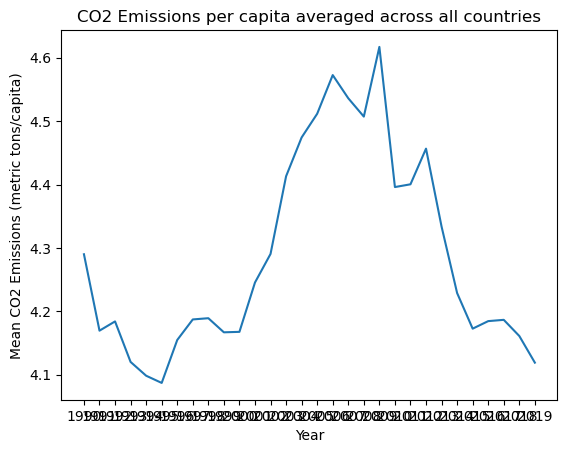

In [19]:
#Assign x,y values
world_x = mydf[mydf.columns[2:32]].mean().index
world_y = mydf[mydf.columns[2:32]].mean()

#Plot
plt.plot(world_x, world_y)
plt.title("CO2 Emissions per capita averaged across all countries")
plt.ylabel("Mean CO2 Emissions (metric tons/capita)")
plt.xlabel("Year")

## 2011年哪个地区的二氧化碳排放量（CO2 emissions）最高?

#### 一共有哪些地区?

In [15]:
mydf.Region

0                      South Asia
1              Sub-Saharan Africa
2           Europe & Central Asia
3           Europe & Central Asia
4      Middle East & North Africa
                  ...            
186           East Asia & Pacific
187    Middle East & North Africa
188            Sub-Saharan Africa
189            Sub-Saharan Africa
190            Sub-Saharan Africa
Name: Region, Length: 191, dtype: object

#### 返回唯一的地区（去掉重名地区）:

In [16]:
mydf.Region.unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

#### 根据地区分组，然后使用mean函数做聚合

In [17]:
by_region = mydf.groupby('Region').agg('mean') #groupby then aggregate
by_region['2011']

Region
East Asia & Pacific            4.285651
Europe & Central Asia          6.619046
Latin America & Caribbean      3.230307
Middle East & North Africa     9.528568
North America                 16.300022
South Asia                     0.905689
Sub-Saharan Africa             0.915139
Name: 2011, dtype: float64

#### 获得聚合后的结果

In [18]:
by_region['2011']

Region
East Asia & Pacific            4.285651
Europe & Central Asia          6.619046
Latin America & Caribbean      3.230307
Middle East & North Africa     9.528568
North America                 16.300022
South Asia                     0.905689
Sub-Saharan Africa             0.915139
Name: 2011, dtype: float64

#### 绘制2011年地区平均二氧化碳排放量图

Text(0.5, 1.0, 'Mean CO2 Emission by Region in 2011')

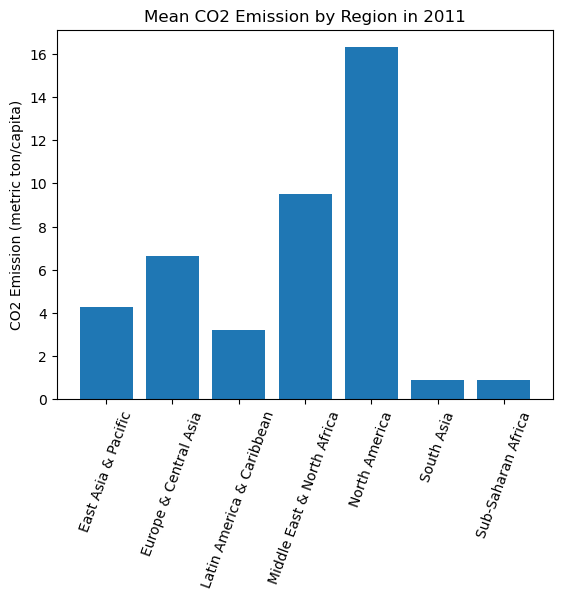

In [19]:
plt.bar(range(len(by_region['2011'])),by_region['2011'].values)
plt.xticks(range(len(by_region['2011'])), by_region['2011'].index, rotation=70)
plt.ylabel('CO2 Emission (metric ton/capita)')
plt.title('Mean CO2 Emission by Region in 2011')

<br>

### <span style="color: red">轮到你了:</span> 
## 2011年哪个收入群体有最高的平均二氧化碳排放量?

第一，先在mydf中得到收入群体种类，注意使用**unique**去除重复。

In [21]:
### Your Code here:
mydf.IncomeGroup.unique()



array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income', nan], dtype=object)

然后，对数据帧进行分组，通过IncomeGroup这一列进行分组，然后聚合求平均

In [22]:
### Your Code here:

# Remember to limit to 2011. 
# Assign result to a new variable, by_incomegroup
by_income = mydf.groupby('IncomeGroup').agg('mean')
by_income['2011']



IncomeGroup
High income            9.575995
Low income             0.312451
Lower middle income    1.293243
Upper middle income    4.073902
Name: 2011, dtype: float64

在条线图(bar graph)中绘制结果

Text(0.5, 1.0, 'Mean CO2 Emission by Different Income Groups in 2011')

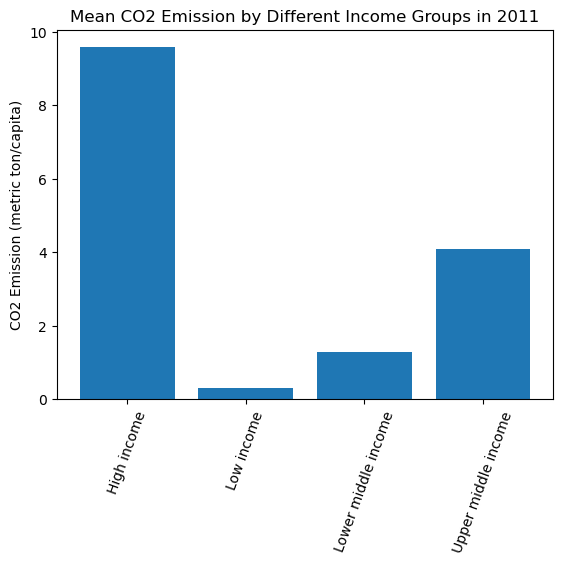

In [23]:
### Your Code here:

plt.bar(range(len(by_income['2011'])),by_income['2011'].values)
plt.xticks(range(len(by_income['2011'])), by_income['2011'].index, rotation=70)
plt.ylabel('CO2 Emission (metric ton/capita)')
plt.title('Mean CO2 Emission by Different Income Groups in 2011')


<br><hr>

## 展示1990年至2019年的二氧化碳排放量趋势

我们可以创建一个折线图来展示这个趋势

In [20]:
def plot_countries(mydf):
    from pylab import rcParams
    rcParams['figure.figsize'] = (12,6)
    import numpy as np

    for i in range(0,len(mydf)):
        plt.plot(mydf.iloc[i,][2:32])
    plt.xticks(rotation = 70)
    
    plt.legend(mydf["Country Name"].values, ncol=4, loc='upper center', 
               bbox_to_anchor=[0.4, -0.1], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.0,
               fancybox=True)
    plt.ylabel("CO2 Emission (metric ton/capita)")
    plt.title("CO2 Emission Per Capita by Country and Year")
    plt.show()

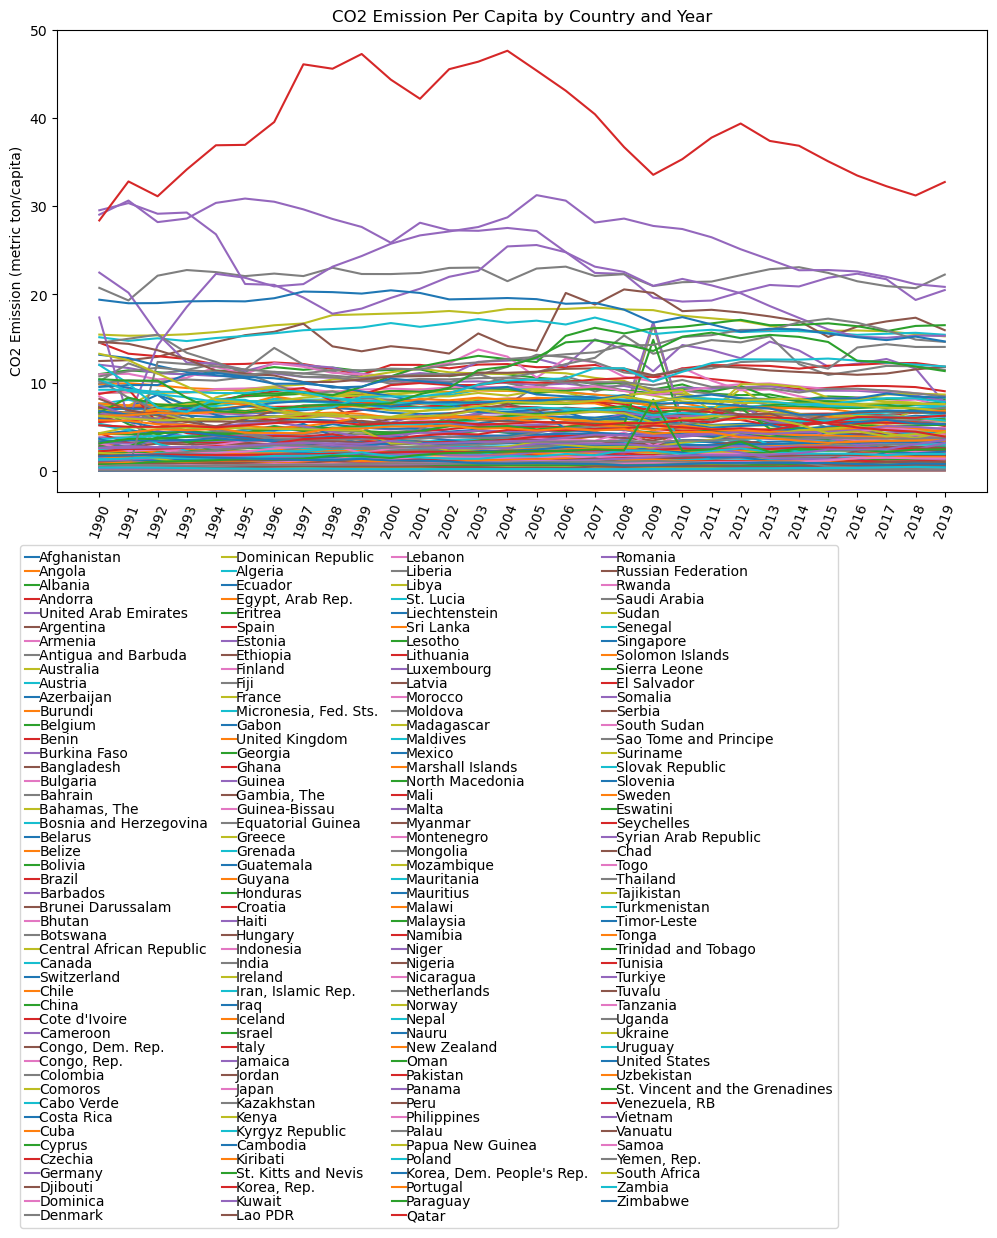

In [21]:
plot_countries(mydf)

<hr>